In [40]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

%matplotlib inline

**TASK #1**

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте Information gain в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [21]:
data = pd.read_csv('/Users/avyny/ML-course-Python/Datasets for ML course/train_data_tree.csv')
X = data.iloc[:, :2]
Y = data.num
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

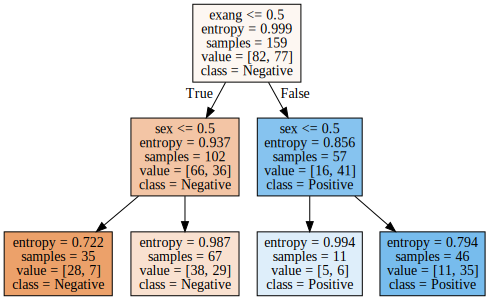

In [22]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

**TASK #2**

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно. 

Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [32]:
iris = load_iris()
x = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

**TASK #3**

Осуществите перебор всех деревьев на данных ириса по следующим параметрам:
- максимальная глубина - от 1 до 10 уровней
- минимальное число проб для разделения - от 2 до 10
- минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [39]:
clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1, 10),
             'min_samples_split': range(2, 10),
             'min_samples_leaf': range(1, 10)}
search = GridSearchCV(clf, param_grid = parameters, cv = 5)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
best_tree

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**TASK #4**

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью <u>**RandomizedSearchCV**</u>

- максимальная глубина - от 1 до 10 уровней
- минимальное число проб для разделения - от 2 до 10
- минимальное число проб в листе - от 1 до 10

Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [42]:
clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1, 10),
             'min_samples_split': range(2, 10),
             'min_samples_leaf': range(1, 10)}
search = RandomizedSearchCV(clf, param_distributions = parameters, cv = 5)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
best_tree

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')